<a href="https://colab.research.google.com/github/Moamen189/Decision_Tree_Regression/blob/main/Decision_Tree_Regression_%E2%80%99Mobile_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price using Decision Tree 

## Importing the libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [48]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile phone price.csv')

dataset.head(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [49]:
dataset.shape

(407, 8)

In [50]:
dataset.describe(include='all')

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
count,407,407,407,407,407,407,407.000000,407
unique,16,239,13,20,41,143,NaN,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,NaN,$149
freq,79,6,125,68,108,29,NaN,18
mean,NaN,NaN,NaN,NaN,NaN,NaN,4676.476658,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,797.193713,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1821.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4300.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN


# Data Preprocessing

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


# Check if ther is any nulls or Redundant data


In [52]:
dataset.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [53]:
dataset.duplicated().sum()

26

In [54]:
dataset.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [55]:
dataset.columns=dataset.columns.str.replace(" ","")

In [56]:
dataset.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'ScreenSize(inches)', 'Camera(MP)',
       'BatteryCapacity(mAh)', 'Price($)'],
      dtype='object')

# Show some columns 

In [57]:
dataset['Price($)'].value_counts()

$149     18
$199     15
$279     15
$299     14
699      13
         ..
$309      1
$389      1
259       1
$109      1
1049      1
Name: Price($), Length: 89, dtype: int64

<Axes: >

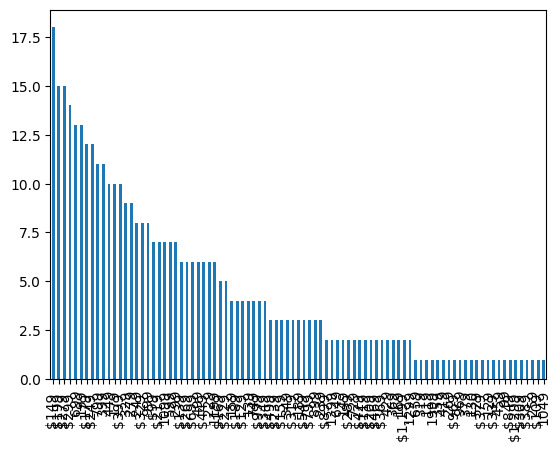

In [58]:
dataset['Price($)'].value_counts().plot(kind='bar')

<Axes: >

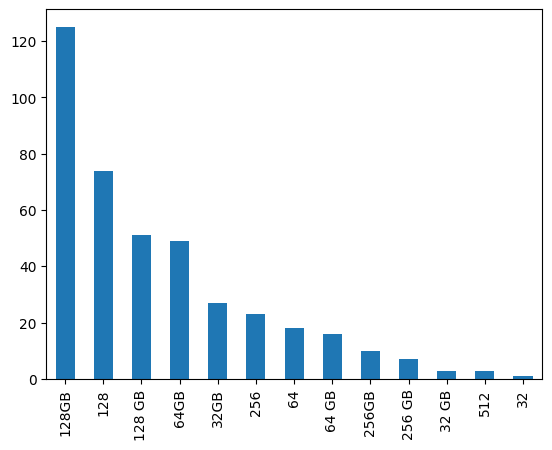

In [59]:
dataset['Storage'].value_counts().plot(kind='bar')

<Axes: >

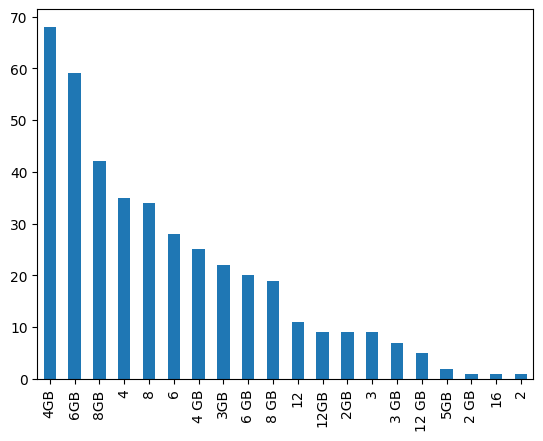

In [60]:
dataset['RAM'].value_counts().plot(kind='bar')

<Axes: >

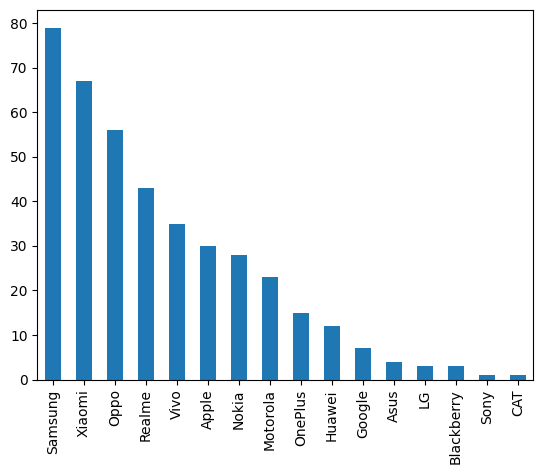

In [63]:
dataset['Brand'].value_counts().plot(kind='bar')

<Axes: >

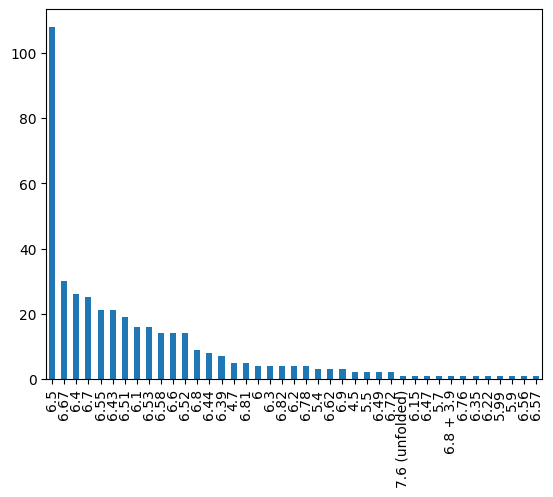

In [64]:
dataset['ScreenSize(inches)'].value_counts().plot(kind='bar')

In [65]:
dataset.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'ScreenSize(inches)', 'Camera(MP)',
       'BatteryCapacity(mAh)', 'Price($)'],
      dtype='object')

In [66]:
dataset.drop(['BatteryCapacity(mAh)', 'RAM','Camera(MP)'], axis=1,inplace= True)

In [67]:
dataset.head()

,Brand,Model,Storage,ScreenSize(inches),Price($)
0,Apple,iPhone 13 Pro,128 GB,6.1,999
1,Samsung,Galaxy S21 Ultra,256 GB,6.8,1199
2,OnePlus,9 Pro,128 GB,6.7,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6.67,279
4,Google,Pixel 6,128 GB,6.4,799


# Replace Categorical Values with numbers 
- This method called `One Hot Encoding`


In [68]:
categorical_features = ['Model', 'Brand']
dataset=pd.get_dummies(dataset,columns=categorical_features,drop_first=True)
dataset.head()

,Storage,ScreenSize(inches),Price($),Model_2.4,Model_3.1 Plus,Model_3.4,Model_5.3,Model_5.4,Model_6.2,Model_7,...,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128 GB,6.1,999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,256 GB,6.8,1199,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,128 GB,6.7,899,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,128 GB,6.67,279,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,128 GB,6.4,799,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the dataset into the Training set and Test set

In [73]:
x = dataset.drop('Price($)', axis=1)
y = dataset['Price($)']


In [74]:
num_list =['ScreenSize(inches)','Storage']

In [75]:
import numpy as np

# Exclude non-numeric values from x[num_list]
numeric_x = x[num_list].apply(pd.to_numeric, errors='coerce')

# Initialize and apply scaler to numeric_x
scaler = StandardScaler()
x[num_list] = scaler.fit_transform(numeric_x)


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=10)

## Training the Decision Tree Regression model on the training set

In [77]:
print("X's shapes: ")
print(x_train.shape, x_test.shape)
print("Y's shapes: ")
print(y_train.shape, y_test.shape)

X's shapes: 
(284, 255) (123, 255)
Y's shapes: 
(284,) (123,)


In [78]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_train
x_train_imputed = imputer.fit_transform(x_train)

# Create the decision tree model
tree = DecisionTreeClassifier(max_depth=3)

# Ensure the dimensions of y_train match the number of samples in x_train_imputed
y_train = y_train[:x_train_imputed.shape[0]]

# Train the model on the imputed training set
tree.fit(x_train_imputed, y_train)


DecisionTreeClassifier(max_depth=3)

In [79]:
# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)

# Predict on the imputed testing set
y_pred = tree.predict(x_test_imputed)


In [82]:
from sklearn.metrics import accuracy_score

# Ensure the dimensions of y_test match the number of predictions in y_pred
y_test = y_test[:len(y_pred)]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 1000, 2), "%")


Accuracy: 65.04 %


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     $1,299        0.00      0.00      0.00         1
       $129        0.00      0.00      0.00         1
       $139        0.00      0.00      0.00         2
       $149        0.08      1.00      0.14         7
       $159        0.00      0.00      0.00         1
       $169        0.00      0.00      0.00         3
       $179        0.00      0.00      0.00         4
       $189        0.00      0.00      0.00         1
       $199        0.00      0.00      0.00         5
       $219        0.00      0.00      0.00         1
       $229        0.00      0.00      0.00         1
       $249        0.00      0.00      0.00         2
       $279        0.00      0.00      0.00         7
       $299        0.00      0.00      0.00         7
       $319        0.00      0.00      0.00         1
       $329        0.00      0.00      0.00         3
       $349        0.00      0.00      0.00         2
       $389        0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing the Real Values with Predicted Values in Mobile Price

In [84]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
61,199,$149
1,1199,$149
241,$199,$149
382,299,399
47,199,$149
...,...,...
386,329,399
17,199,$149
269,$179,$149
299,199,399


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import re

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(handle_unknown='ignore')

# Encode the categorical variables in your dataset
X_train_encoded = encoder.fit_transform(x_train)

# Preprocess the target variable
y_train_processed = np.array([re.sub('[^\d.]', '', price) for price in y_train]).astype(float)
y_train_encoded = y_train_processed

# Create an instance of the DecisionTreeRegressor class
regressor = DecisionTreeRegressor()

# Fit the model to the encoded dataset
regressor.fit(X_train_encoded, y_train_encoded)

DecisionTreeRegressor()

# Predicting the Results

In [86]:
X_test_encoded = encoder.transform(x_test)
y_pred = regressor.predict(X_test_encoded)
y_pred

array([ 189.        ,  269.        ,  196.5       ,  299.        ,
        299.        ,  199.        ,  329.        ,  799.        ,
         99.        ,  449.        ,  269.        ,  749.        ,
        799.        ,  149.        ,  199.        ,  369.        ,
        449.        ,  279.        ,  299.        ,  329.        ,
        369.        ,  269.        ,  249.        ,  269.        ,
        199.        ,  219.        ,  269.        ,  149.        ,
        299.        ,  379.        ,  265.66666667,  194.        ,
        194.        ,  129.        ,  399.        ,  449.        ,
         99.        ,  164.        ,  799.        ,  279.        ,
        399.        ,  599.        , 1199.        ,  229.        ,
        399.        ,  159.        ,  149.        ,  194.        ,
        399.        ,  399.        ,  164.        ,  449.        ,
        799.        ,  249.        ,  384.        ,  699.        ,
        899.        ,  299.        ,  449.        ,  799.     

In [93]:
import numpy as np
import sklearn.metrics as sm

# Clean the data
y_test_cleaned = np.array([float(value.replace(',', '').replace('$', '').strip()) for value in y_test])

# Calculate the metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_cleaned, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_cleaned, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_cleaned, y_pred), 2)) 
print("Explained variance score =", round(sm.explained_variance_score(y_test_cleaned, y_pred), 2))



Mean absolute error = 102.48
Mean squared error = 41626.64
Median absolute error = 30.0
Explained variance score = 0.58
